**Exámen práctico**

Recta de regresión ajustada:
Y = -3.07 + 0.00 * X


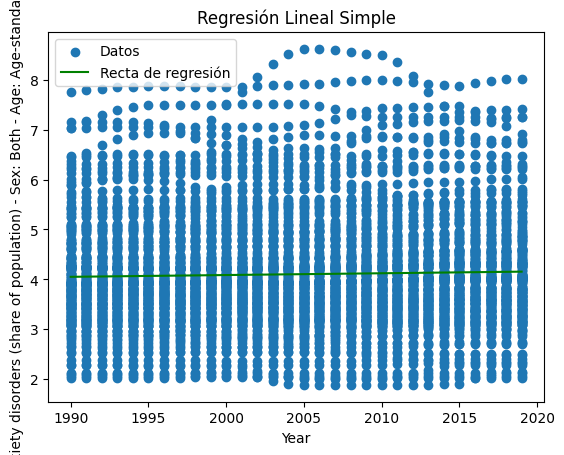

Coeficiente de correlación (r): 0.02948647738938569
Coeficiente de determinación (r^2): 0.0008694523488347536
Intervalo de confianza del 95% para β_0: const   -9.021819
Year     0.000610
Name: 0, dtype: float64
Intervalo de confianza del 95% para β_1: const    2.878872
Year     0.006547
Name: 1, dtype: float64


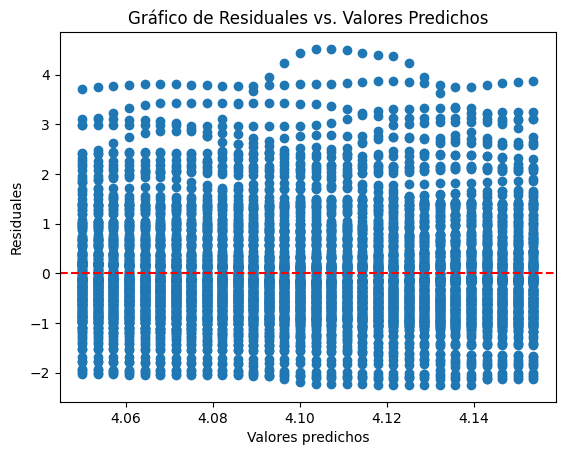

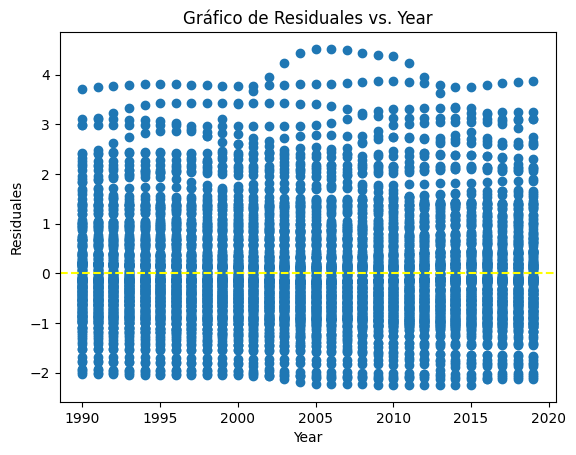

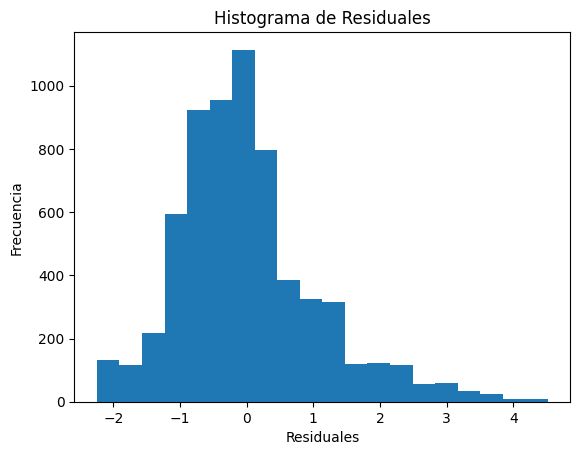

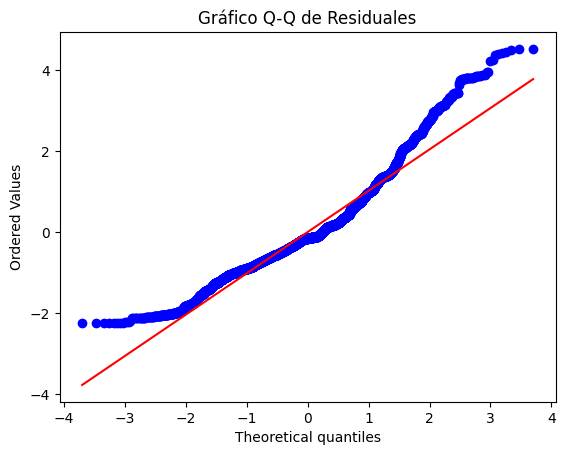

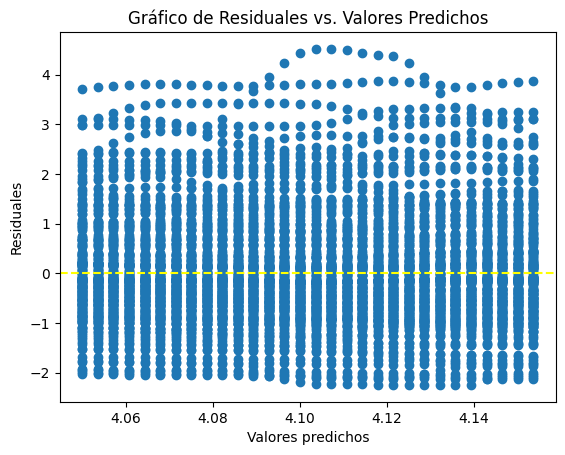

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Karlamch/karlaMCH/refs/heads/main/mental_health.csv")
df

#a)hipótesis de causalidad: Redacta una hipótesis sobre la causalidad entre las dos variables, a su vez, establece la variable dependiente y la variable independiente.

#Identifique la variable dependiente y la variable independiente.
#Un grupo de personas de entre 25 y 34 años que nos indican experimentar tensión laboral algo alta en una encuesta presenta una probabilidad
#significativamente mayor de haber sido diagnosticado con trastornos de ansiedad en comparación con quienes muestran una baja tensión laboral.

X = df["Year"]
Y = df["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized"]

#b)Recta de regresión ajustada: Realiza los cálculos necesarios para encontrar la recta de regresión ajustada. Incluye los procedimientos que te llevaron a la recta de regresión (Colab)
import statsmodels.api as sm
X_constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_constante).fit()

b0, b1 = modelo.params

Fun = b0 + b1 * X

print("Recta de regresión ajustada:")
print(f"Y = {b0:.2f} + {b1:.2f} * X")

#c)Gráfica los puntos y la recta de regresión (Colab)
import matplotlib.pyplot as plt


plt.scatter(X, Y, label='Datos')
plt.plot(X, Fun, color='green', label='Recta de regresión')
plt.xlabel('Year')
plt.ylabel('Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()

#d)Coeficiente de correlación y determinación: Realiza los cálculos necesarios para obtener la r de Pearson y el coeficiente de determinación.
from scipy.stats import pearsonr
r,_ = pearsonr(X, Y)
r_cuadrado = r**2

print("Coeficiente de correlación (r):", r)
print("Coeficiente de determinación (r^2):", r_cuadrado)

#e)Interpreta los resultados del coeficiente de correlación y el coeficiente de determinación.
#En este caso, el valor 0.02948647738938569 es muy cercano a 0. Esto indica que la correlación lineal entre las dos variables analizadas es extremadamente débil.
#En otras palabras, prácticamente no hay una relación lineal significativa entre ellas.

#En este caso, el valor de r2 (0.0008694523488347536) es prácticamente cero.
#Esto indica que la variable independiente tiene una influencia mínima, casi nula, en la variabilidad de la variable dependiente

#f)Calcula el intervalo de confianza del 95% para β_1 y β_0 ¿Qué dice el intervalo de confianza a la posibilidad de que β_1 sea igual a cero? (Colab)
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha=1-nivel_de_confianza)

print("Intervalo de confianza del 95% para β_0:", intervalo_de_confianza[0])
print("Intervalo de confianza del 95% para β_1:", intervalo_de_confianza[1])

#g)Realiza el gráfico de los residuales: A partir de este gráfico, menciona si los datos cumplen con los supuestos para la regresión: linealidad,
#normalidad en torno a la recta, homoscedasticidad (hay más, pero con estas nos bastan) (Colab)
#Gráfico de residuales vs. valores predichos
residuales = modelo.resid

# Gráfico de residuales vs. valores predichos
plt.scatter(modelo.fittedvalues, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Predichos')
plt.show()

# Gráfico de residuales vs. variable independiente
plt.scatter(df['Year'], residuales)
plt.axhline(y=0, color='yellow', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Year')
plt.show()

#Normalidad en torni a la recta
import scipy.stats as stats
import matplotlib.pyplot as plt

#Histograma de los residuales
plt.hist(residuales, bins=20)
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales')
plt.show()

#Gráfico Q-Q de los residuales
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuales')
plt.show()

#Homoscedasticidad
plt.scatter(modelo.fittedvalues, residuales)
plt.axhline(y=0, color='yellow', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Predichos')
plt.show()
